In [7]:
import os
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm 
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Get the path to the RNACOREX directory
RNACOREX_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'RNACOREX'))

# Add the miRNetClassifier path to sys.path
sys.path.append(RNACOREX_path)

# Define a function for display and save results in graphics.

def plot_results_cv(accuracy_results, notebook, rank = False):

    fig, axs = plt.subplots(2, 2, figsize=(16,12), gridspec_kw={'hspace': 0.3})

    x = np.arange(len(accuracy_results))
    axs[0, 0].plot(x, accuracy_results['Test'], label='RNACOREX', c = 'blue', linewidth=2)
    axs[0, 0].fill_between(x, accuracy_results['Test'] - accuracy_results['STD Test'], accuracy_results['Test'] + accuracy_results['STD Test'], alpha=0.15, color='blue')
    axs[0, 0].plot(x, accuracy_results['Random Forest'], color='green', label='Random Forest')
    axs[0, 0].set_title('vs Random Forest')
    axs[0, 0].legend(fontsize=8)
    axs[0, 1].plot(x, accuracy_results['Test'], label='RNACOREX', c = 'blue', linewidth=2)
    axs[0, 1].fill_between(x, accuracy_results['Test'] - accuracy_results['STD Test'], accuracy_results['Test'] + accuracy_results['STD Test'], alpha=0.15, color='blue')
    axs[0, 1].plot(x, accuracy_results['Gradient Boosting'], color='red', label='Gradient Boosting')
    axs[0, 1].set_title('vs Gradient Boosting')
    axs[0, 1].legend(fontsize=8)
    axs[1, 0].plot(x, accuracy_results['Test'], label='RNACOREX', c = 'blue', linewidth=2)
    axs[1, 0].fill_between(x, accuracy_results['Test'] - accuracy_results['STD Test'], accuracy_results['Test'] + accuracy_results['STD Test'], alpha=0.15, color='blue')
    axs[1, 0].plot(x, accuracy_results['SVM'], color='grey', label='SVM')
    axs[1, 0].set_title('vs SVM')
    axs[1, 0].legend(fontsize=8)

    accuracy_results['X'] = accuracy_results['X'].astype(str)
    accuracy_results = accuracy_results.sort_values(by=['Test_from_mean'], ascending=True)

    if rank == True:

        def remove_first_word(string):
            if 'Test' in string:
                return 'RNACOREX'
            words = string.split()  # Split the string into a list of words
            return ' '.join(words[1:]) 

        rank = pd.DataFrame({
            'Accuracy Test': accuracy_results['Test'],
            'Accuracy RF': accuracy_results['Random Forest'],
            'Accuracy SVC': accuracy_results['SVM'],
            'Accuracy GB': accuracy_results['Gradient Boosting']
            })

        acc_ranking = rank.rank(axis=1, method='min', ascending=False)

        axs[1, 1].plot([1, 4], [0, 0], color='lightgray', linewidth=5)

        markers = ['o', 's', '^', 'D']
        for column, rank in acc_ranking.mean().items():
            axs[1, 1].plot(rank, 0, 'o', label=f'{remove_first_word(column)}', markersize=10)

        for rank in acc_ranking.mean():
            axs[1, 1].text(rank, 0.01, f'{rank:.2f}', ha='center', va='bottom', color='black', fontsize=10)

        axs[1, 1].set_xlim(1, 4)
        axs[1, 1].set_title('Mean Rank')
        axs[1, 1].set_xlabel('Rank')
        axs[1, 1].set_yticks([])

        textstr = '\n'.join([f'{remove_first_word(column)}: {rank:.2f}' for column, rank in acc_ranking.mean().items()])
        props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

        axs[1, 1].text(0.95, 0.85, textstr, transform=axs[1, 1].transAxes, fontsize=12,
                       verticalalignment='center', horizontalalignment='right', bbox=props)
        axs[1, 1].legend(loc='upper left', ncol=2, fontsize=12)
        plt.savefig('PLOS Results/'+notebook+'_rank.svg')
    
    else:

        colors = ['red' if value < 0 else 'green' for value in accuracy_results['Test_from_mean']]
        axs[1, 1].scatter(x, accuracy_results['Test_from_mean'], c=colors, s=10)
        axs[1, 1].set_title('Model Accuracy')
        axs[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)

        plt.savefig('PLOS Results/'+notebook+'_plot.svg')

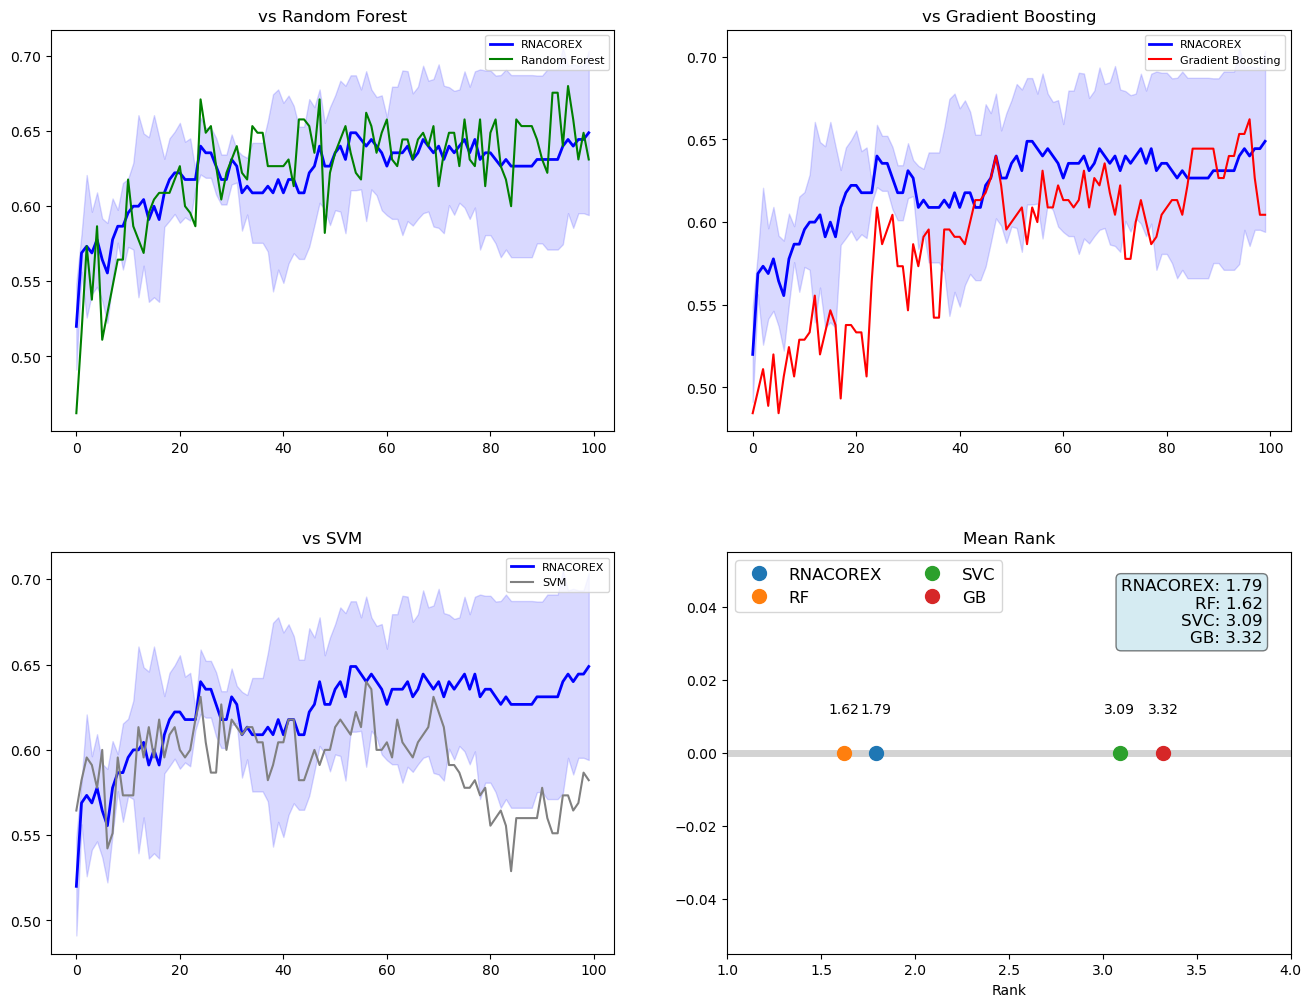

In [8]:
results = pd.read_csv('PLOS Results/results_brca.csv')

plot_results_cv(results, 'brca', rank = True)